In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import model_selection

##Problem 3.1

Digit keys: dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
images.shape: (1797, 8, 8)
target[0:10]: [0 1 2 3 4 5 6 7 8 9]
images.shape: (1797, 8, 8)


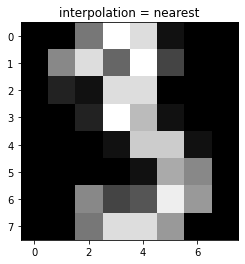

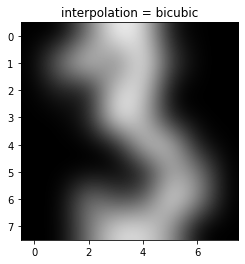

In [ ]:
digits = load_digits()
print('Digit keys:', digits.keys())

data = digits['data']
images = digits['images']
target = digits['target']
target_names = digits['target_names']

print('images.shape:', images.shape)
print('target[0:10]:', target[0:10])
print('images.shape:', images.shape)

img = images[3]
assert 2 == len(img.shape)

# plotting image of a three
plt.figure(0)
plt.gray()
plt.title('interpolation = nearest')
plt.imshow(img, interpolation='nearest')
plt.show()

plt.figure(1)
plt.gray()
plt.title('interpolation = bicubic')
plt.imshow(img, interpolation='bicubic')
plt.show()

# seperating data into training and test data
X_all = data
y_all = target
X_train, X_test, y_train, y_test =\
model_selection.train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)


There are 1797 images of size 8x8 pixels.

##Problem 3.2

In [ ]:
def dist_loop(training, test):
    '''
    Calculates the MxN distance matrix using for loops
    '''
    
    D = np.shape(training)[1]
    N = np.shape(training)[0]
    M = np.shape(test)[0]
    distance = np.zeros((N, M))

    for i in range(N):
        for j in range(M):
            distance[i, j] = np.linalg.norm(training[i] - test[j])

    return(distance)


%timeit distance_loop = dist_loop(X_train, X_test)
distance_loop = dist_loop(X_train, X_test)
print('min distance_loop:', np.min(distance_loop))
print('max distance_loop:', np.max(distance_loop))

1 loop, best of 3: 4.81 s per loop
min distance_loop: 8.06225774829855
max distance_loop: 75.91442550661897


##Problem 3.3

In [ ]:
def dist_vec(training, test):
    '''
    Calculates the MxN distcance matrix using vectorization
    '''

    M = np.shape(test)[0]

    test = np.rot90(test, k=1, axes=(0, 1))
    test = np.flip(test, axis=0)

    training = np.tile(training[:,:,np.newaxis], (1, 1, M))

    distance = np.linalg.norm((training - test), axis=1)

    return(distance)

%timeit distance_vec = dist_vec(X_train, X_test)

distance_vec = dist_vec(X_train, X_test)
print('min distance_vec', np.min(distance_vec))
print('max distance_vec', np.max(distance_vec))

1 loop, best of 3: 415 ms per loop
min distance_vec 8.06225774829855
max distance_vec 75.91442550661897


The vectorized function returns the same distances and is significantly faster (4.680s vs 0.418s)

##Problem 3.4

In [ ]:
def kNN_classifier(k, X_train, X_test, y_train):
    """
    Returns the prediction of given test data set using the
    k nearest neighbor approach
    """

    M = np.shape(X_test)[0]
    distance = dist_vec(X_train, X_test)
    indices = np.argsort(distance, axis=0)

    # indices of k nearest neigbors in array (k x M)
    kmin_indices = indices[0:k,:]

    # finding the majority label of nearest neigbors
    y_predict = np.zeros(M)
    for i in range(M):
        y_predict_temp = y_train[kmin_indices[:,i]]
        y_predict_final = np.bincount(y_predict_temp).argmax()
        y_predict[i] = y_predict_final


    return(y_predict)


def error_calc(y_predict, y_test):
    """
    Returns error of NN classifier prediction
    """

    temp_arr = (y_predict == y_test)
    error = 1 - (np.sum(temp_arr) / len(y_test))

    return(error)


def create_digitdata(X, target, digit1, digit2):
    """
    Returns dataset where the targets only correspond to digit1 or digit2
    """

    bool_1 = (target == digit1)
    bool_2 = (target == digit2)
    bool_1_2 = bool_1 + bool_2
    indices_1_2 = np.where(bool_1_2 == True)[0]
    X_new = X[indices_1_2, :]

    target_new = target[indices_1_2]

    return(X_new, target_new)

Error for k=1: 0.01388888888888884
Error for k=3: 0.00694444444444442
Error for k=5: 0.00694444444444442
Error for k=9: 0.00694444444444442
Error for k=17: 0.00694444444444442
Error for k=33: 0.02083333333333337


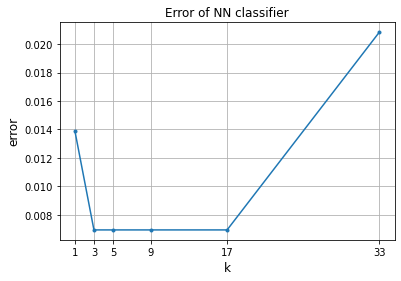

In [ ]:
X_train_new, y_train_new = create_digitdata(X_train, y_train, 3, 9)
X_test_new, y_test_new = create_digitdata(X_test, y_test, 3, 9)

k_arr = np.array([1, 3, 5, 9, 17, 33])
error_arr = []

for k in k_arr:
    y_predict = kNN_classifier(k, X_train_new, X_test_new, y_train_new)
    error = error_calc(y_predict, y_test_new)
    print('Error for k={0}:'.format(k), error)
    error_arr.append(error)


plt.figure(0)
plt.title('Error of NN classifier')
plt.plot(k_arr, error_arr, '.-')
plt.xlabel('k', fontsize=12)
plt.ylabel('error', fontsize=12)
plt.xticks([1, 3, 5, 9, 17, 33])
plt.grid()
plt.show()

From k=0 the error decreases for k=3,5,9,17 and also stays constant for those values of k. At k=33 it in increases again. A possible explanation for the increase at k=33 could be the following. If too many possible targets are included in the process of the majority vote, there is a higher chance, that wrong targets with a higher distance might get the majority. This could be solved by introducing some weights during the selection process of the majority penalizing large distances.